In [2]:
import numpy as np
c = 2.998e8 # m/s
# don't use c, just use b and gam(beta)
bg = np.logspace(-1,3,1000)
# solve for b from definition of bg
b = np.sqrt(1/2 * (1 - 1/bg**2))
g = 1/np.sqrt(1-b**2)
# define other constants involved
K = 0.307075 # MeV cm^2 / mol
mec2 = 0.510998 # MeV
z = 1 # charge number, kaons = 1
ZoverA = 74/183.8 # atomic number over atomic mass
m_e = 9.1094e-31 # electron mass in kg
M = 8.801e-28 # kaon mass in kg
I = 727 #eV
Wmax = 2*mec2*b**2*g**2 / (1+2*g*(m_e/M)+ (m_e/M)**2)

/var/folders/9d/rmnl0d9n3wx3lkqxc1zjj8n80000gn/T/ipykernel_1140/740822428.py:6: RuntimeWarning: invalid value encountered in sqrt
  b = np.sqrt(1/2 * (1 - 1/bg**2))


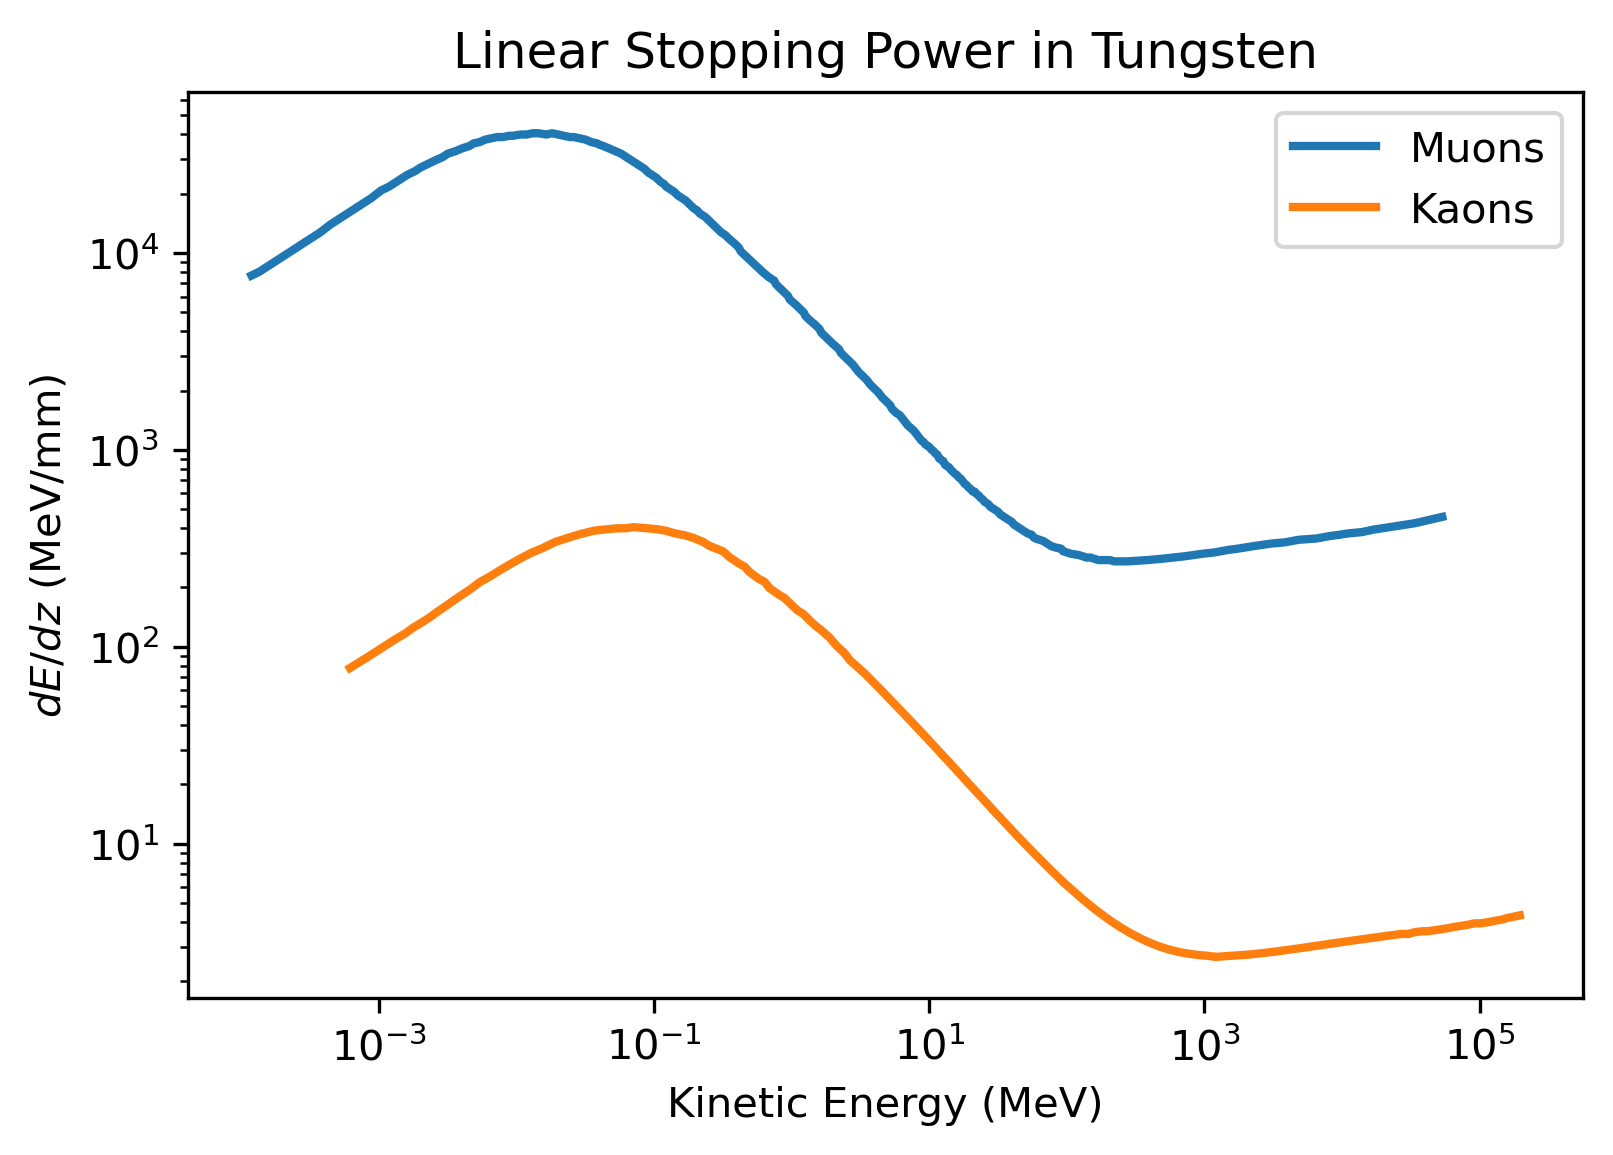

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

#import data - this is the muon energy data.
data = np.genfromtxt("/Users/Chris/Desktop/de_dx.csv",delimiter=',')
x = data[:,0]
y = data[:,1]
density = 19.28 #g/cm^3

energies = x
dedz = density*y*10

# import data - beta*gamma data for muons, applies to kaons
pdata = np.genfromtxt("/Users/Chris/Desktop/de_dz.csv",delimiter=',')
bg = pdata[:,0]
mc2 = 494 # rest energy of kaon, mev
E = mc2*(np.sqrt(1+bg**2)-1) # Mev
dedz_k = pdata[:,1]*density/10 # mev/mm

# plot figure
plt.figure(figsize=(6,4),dpi=300)
plt.loglog(energies,dedz,linewidth=2,label='Muons')
plt.loglog(E,dedz_k,label='Kaons',linewidth=2,linestyle='-',marker='')
plt.xlabel("Kinetic Energy (MeV)")
plt.ylabel(r'$dE/dz$ (MeV/mm)',)
plt.title(r'Linear Stopping Power in Tungsten')
plt.legend()

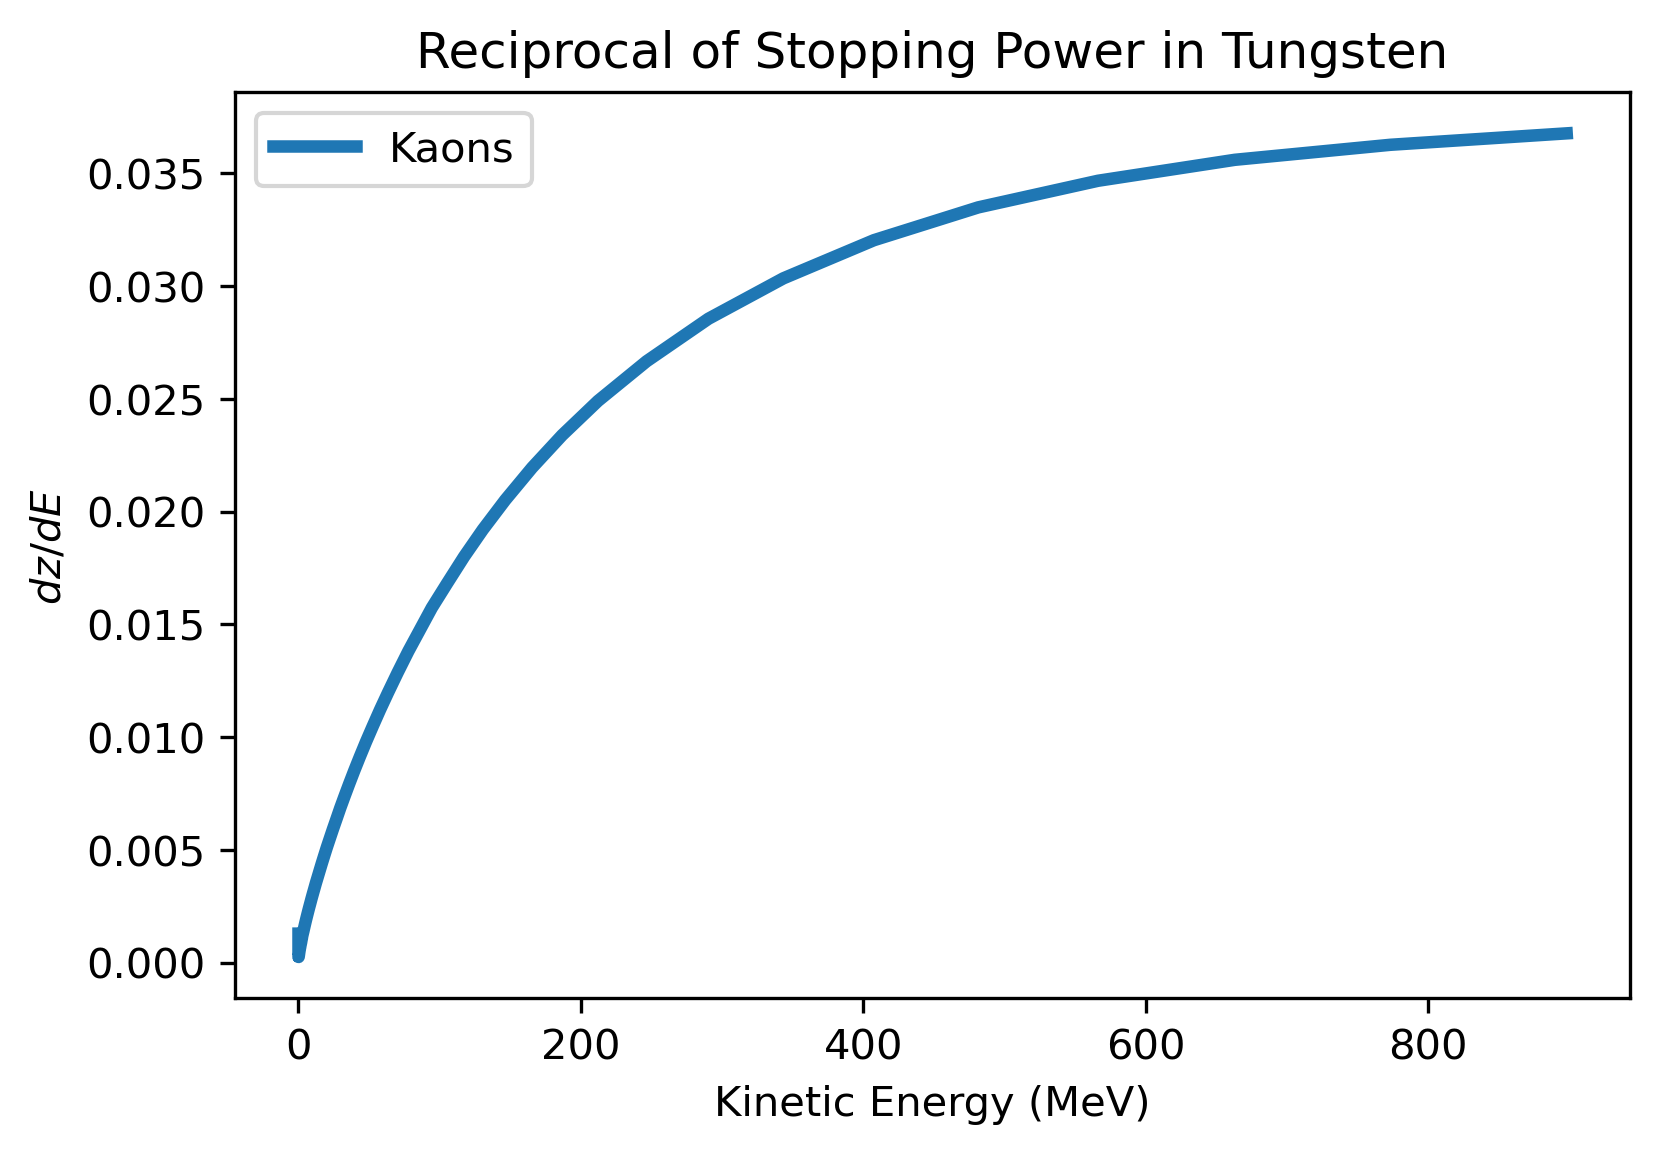

In [11]:
plt.figure(figsize=(6,4),dpi=300)
#plt.loglog(energies,1/dedz,linewidth=3,marker='',linestyle='-',label='Muons')
plt.plot(E,dxde,linewidth=3,marker='',linestyle='-',label="Kaons")
plt.xlabel("Kinetic Energy (MeV)")
plt.ylabel(r'$dz/dE$')
plt.title(r'Reciprocal of Stopping Power in Tungsten')
plt.legend()

In [9]:
# do math with dz/dE
from scipy import integrate

#limit energies and dzde to functional range, energy < 1gev
energy = [energies[i] for i in range(len(energies)) if energies[i] < 1e3]
dzde = 1/dedz[:len(energy)]
E = [E[i] for i in range(len(E)) if E[i] < 1e3]
dxde = 1/dedz_k[:len(E)]

z = [] #mm, muons
x = [] #mm, kaons
for i in range(1,len(dzde)):
    thisz = integrate.simpson(dzde[:i],energy[:i])
    z.append(thisz * 10)
    
for i in range(1,len(dxde)):
    thisx = integrate.simpson(dxde[:i],E[:i])
    x.append(thisx * 10)
    
# airbrush some ugly points
z[-29] = z[-29] + 0.4

15
15


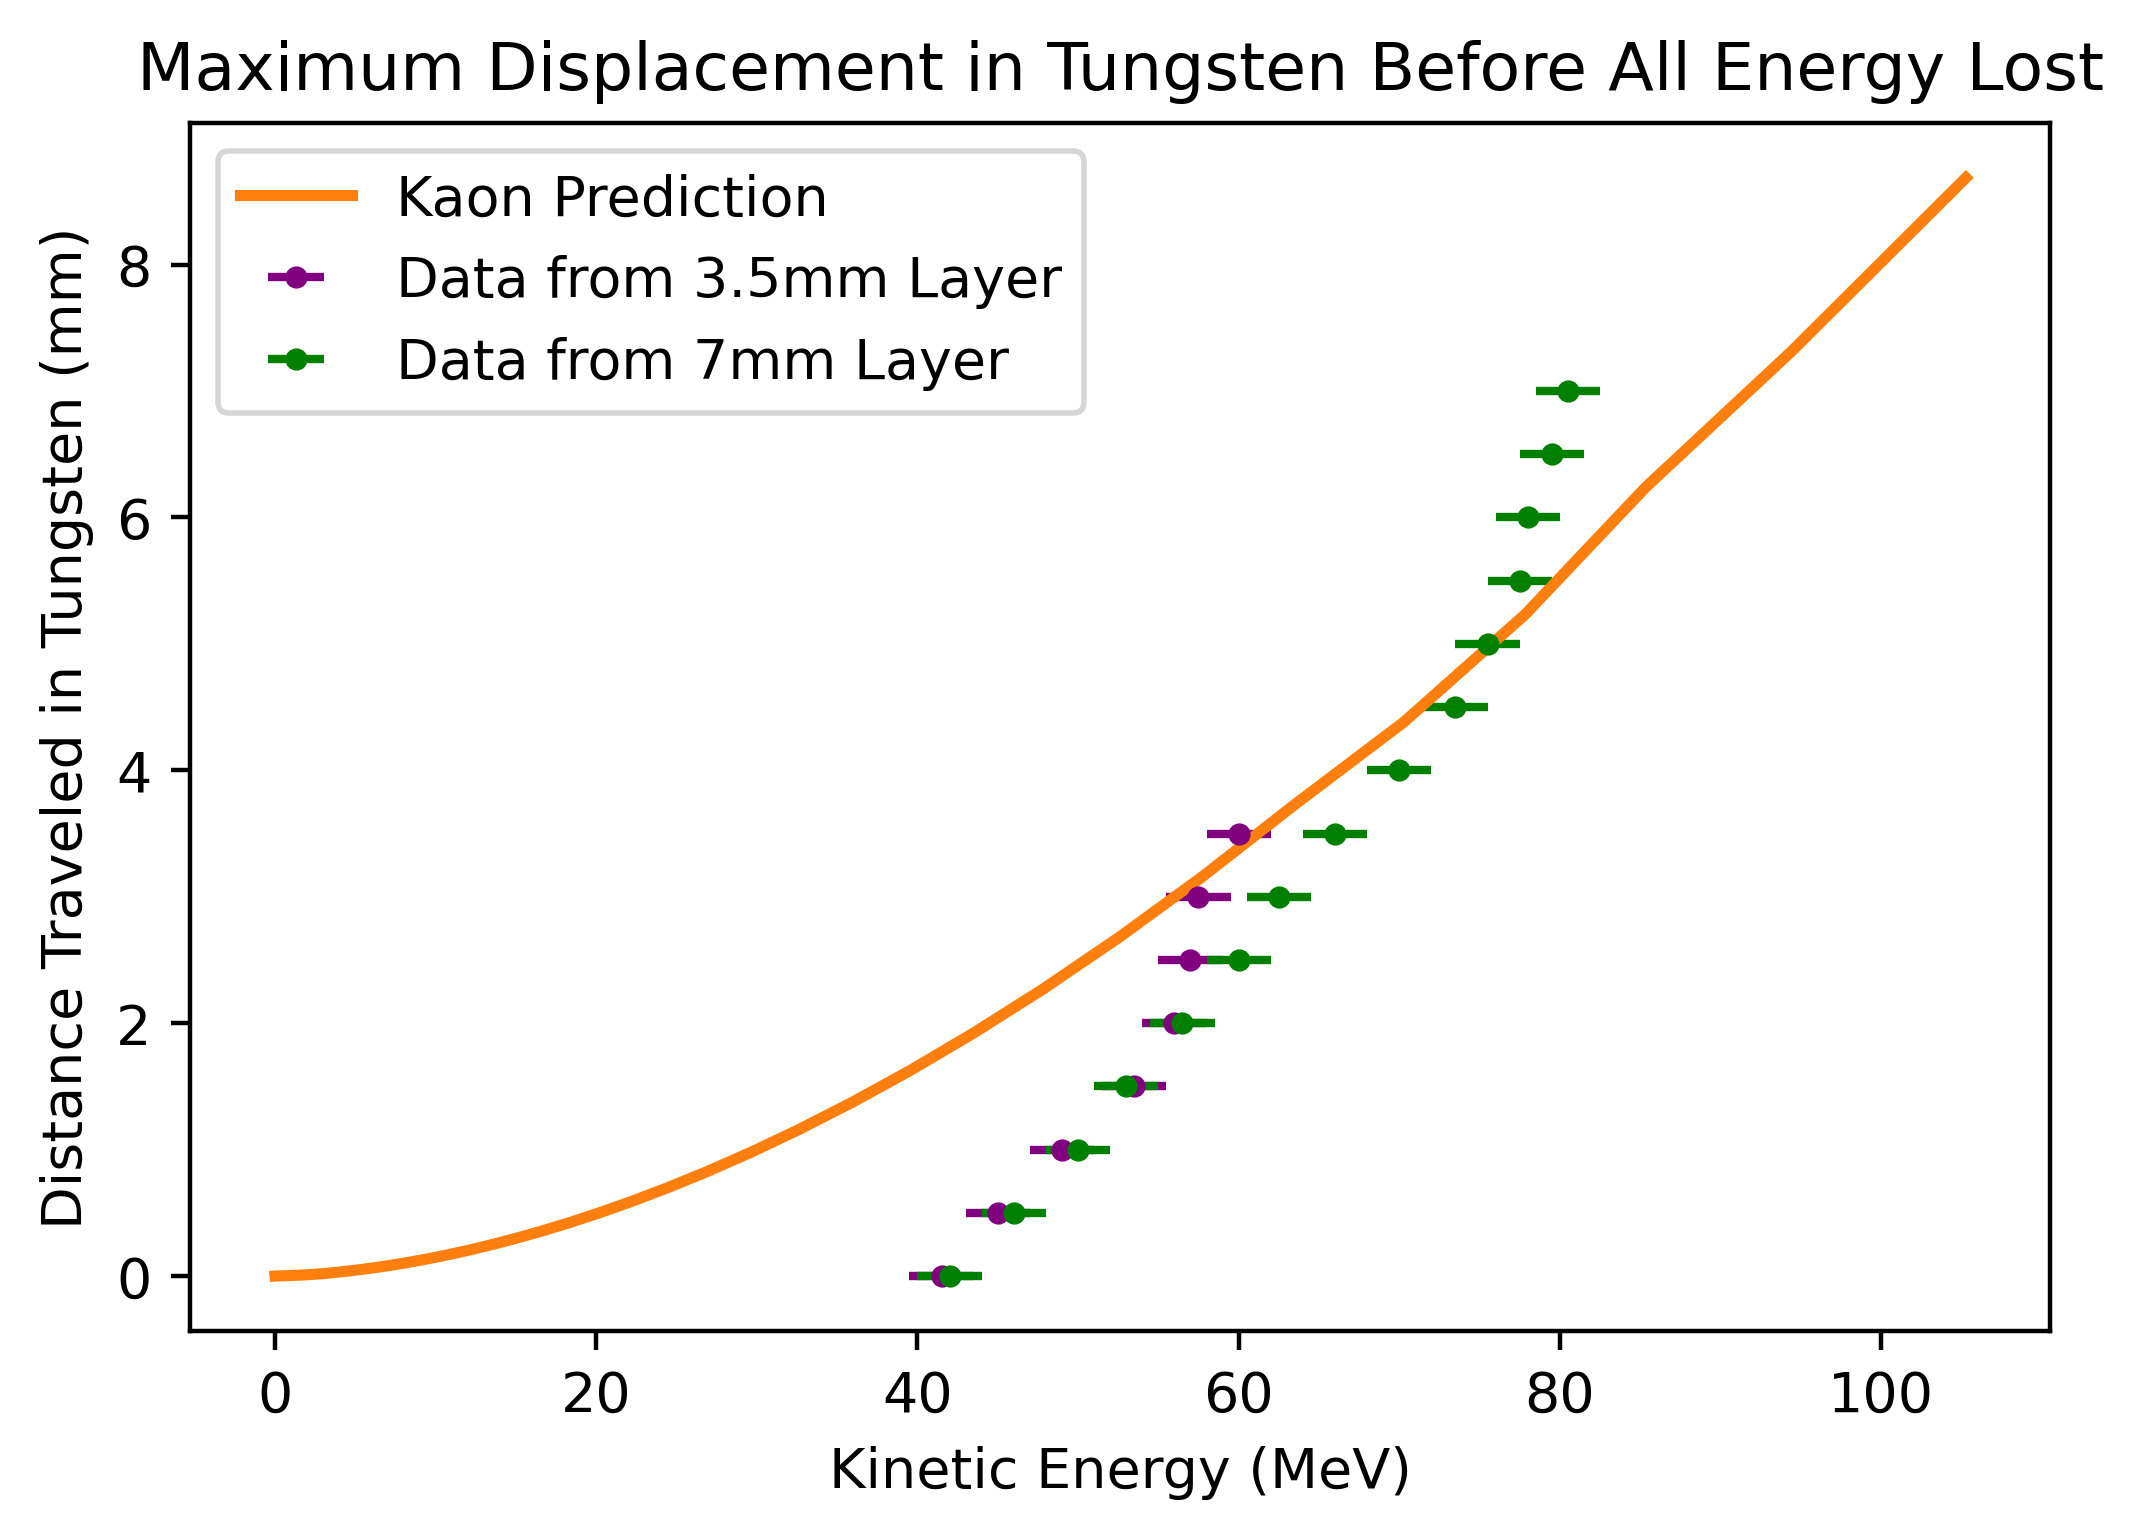

In [426]:
plt.figure(figsize=(6,4),dpi=400)
#plt.plot(energy[1:-25],z[:-25],linestyle='-',marker='',linewidth=2,label="Muon Prediction")
plt.plot(E[1:-15],x[:-15],linestyle='-',marker='',linewidth=2,label="Kaon Prediction",color='C1')
plt.xlabel("Kinetic Energy (MeV)")
plt.ylabel("Distance Traveled in Tungsten (mm)")
plt.title("Maximum Displacement in Tungsten Before All Energy Lost")


# figure out true data
# d layer
edatd = [80.5,79.5,78,77.5,75.5,73.5,70,66,62.5,60,56.5,53,50,46,42]
edatderr = [2]*len(edatd)
zdatd = [7,6.5,6,5.5,5,4.5,4,3.5,3,2.5,2,1.5,1,0.5,0]
# c layer
edat = [60,57.5,57,56,53.5,49,45,41.5]
edat_err = [2]*len(edat)
zdat = [3.5,3.0,2.5,2.0,1.5,1.0,0.5,0]

# plot
plt.errorbar(edat,zdat,xerr=edat_err,marker='.',color='purple',linestyle='',label="Data from 3.5mm Layer")
plt.errorbar(edatd,zdatd,xerr=edatderr,marker='.',color='green',linestyle='',label='Data from 7mm Layer')
plt.legend()

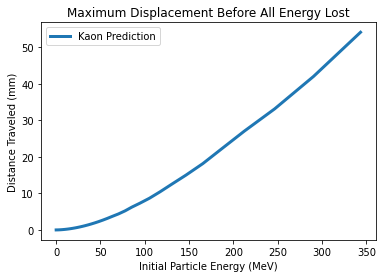

In [395]:
#plt.figure(figsize=(6,4),dpi=400)
plt.plot(E[1:-6],x[:-6],linestyle='-',marker='',linewidth=3,label="Kaon Prediction")
plt.xlabel("Initial Particle Energy (MeV)")
plt.ylabel("Distance Traveled (mm)")
plt.title("Maximum Displacement Before All Energy Lost")
plt.legend()

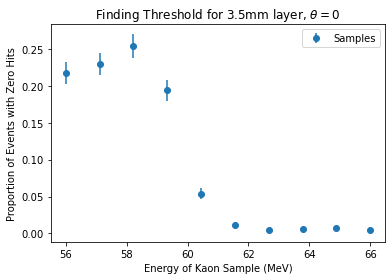

In [396]:
energy1guess = [61, 67, 75, 92]
eset1 = np.linspace(energy1guess[0]-5,energy1guess[0]+5,10)/1000
numzeros1 = [0.217,0.23,0.254,0.194,0.054,0.012,0.005,0.006,0.007,0.004]
numzeros1_err = [np.sqrt((numzeros1[i]*1000))/1000 for i in range(len(numzeros1))]
# plt.figure(dpi=300)
plt.errorbar(eset1*1000,numzeros1,yerr=numzeros1_err,marker='o',linestyle='',label='Samples')
plt.xlabel("Energy of Kaon Sample (MeV)")
plt.ylabel("Proportion of Events with Zero Hits")
plt.title(r"Finding Threshold for 3.5mm layer, $\theta = 0$")
plt.legend()

In [341]:
# make a script to make plots of the four data points i'm going to plot

# file will be called newthresholds.txt
newthresholds = np.genfromtxt('/Users/chris/Desktop/newthresholds.txt',delimiter=',')
pzeros = newthresholds[:,1]
pzeros1 = pzeros[0:20] # from z = 0
pzeros2 = pzeros[20:40] #0.5
pzeros3 = pzeros[40:60]
pzeros4 = pzeros[60:80] #1.5mm
pzeros5 = pzeros[80:100]
pzeros6 = pzeros[100:120]
pzeros7 = pzeros[120:140]


pzeros1_err = [np.sqrt((pzeros1[i]*1000))/1000 for i in range(len(pzeros1))]
pzeros2_err = [np.sqrt((pzeros2[i]*1000))/1000 for i in range(len(pzeros2))]
pzeros3_err = [np.sqrt((pzeros3[i]*1000))/1000 for i in range(len(pzeros3))]
pzeros4_err = [np.sqrt((pzeros4[i]*1000))/1000 for i in range(len(pzeros4))]
pzeros5_err = [np.sqrt((pzeros5[i]*1000))/1000 for i in range(len(pzeros5))]
pzeros6_err = [np.sqrt((pzeros6[i]*1000))/1000 for i in range(len(pzeros6))]
pzeros7_err = [np.sqrt((pzeros7[i]*1000))/1000 for i in range(len(pzeros7))]

energy1guess = [60,55,50,45,37,30,20]
eset1 = np.linspace(energy1guess[0]-15,energy1guess[0]+15,20)/1000
eset2 = np.linspace(energy1guess[1]-15,energy1guess[1]+15,20)/1000
eset3 = np.linspace(energy1guess[2]-15,energy1guess[2]+15,20)/1000
eset4 = np.linspace(energy1guess[3]-15,energy1guess[3]+15,20)/1000
eset5 = np.linspace(energy1guess[4]-15,energy1guess[4]+15,20)/1000
eset6 = np.linspace(energy1guess[5]-15,energy1guess[5]+15,20)/1000
eset7 = np.linspace(energy1guess[6]-15,energy1guess[6]+15,20)/1000

In [380]:
print(newthresholds[-1][-1])

0.234


No handles with labels found to put in legend.


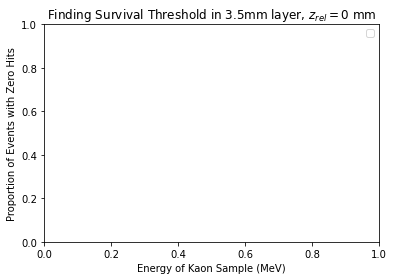

In [398]:
#plt.figure(dpi=300)
#plt.errorbar(eset1*1000,pzeros1,yerr=pzeros1_err,marker='o',linestyle='',label='Samples')
plt.xlabel("Energy of Kaon Sample (MeV)")
plt.ylabel("Proportion of Events with Zero Hits")
plt.title(r"Finding Survival Threshold in 3.5mm layer, $z_{rel}= 0$ mm")
plt.legend()

No handles with labels found to put in legend.


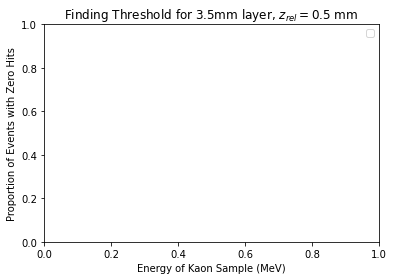

In [399]:
#plt.figure(dpi=300)
#plt.errorbar(eset2*1000,pzeros2,yerr=pzeros2_err,marker='o',linestyle='',label='Samples')
plt.xlabel("Energy of Kaon Sample (MeV)")
plt.ylabel("Proportion of Events with Zero Hits")
plt.title(r"Finding Threshold for 3.5mm layer, $z_{rel} = 0.5$ mm")
plt.legend()

No handles with labels found to put in legend.


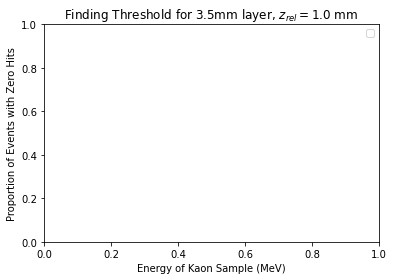

In [400]:
#plt.figure(dpi=300)
#plt.errorbar(eset3*1000,pzeros3,yerr=pzeros3_err,marker='o',linestyle='',label='Samples')
plt.xlabel("Energy of Kaon Sample (MeV)")
plt.ylabel("Proportion of Events with Zero Hits")
plt.title(r"Finding Threshold for 3.5mm layer, $z_{rel} = 1.0$ mm")
plt.legend()

No handles with labels found to put in legend.


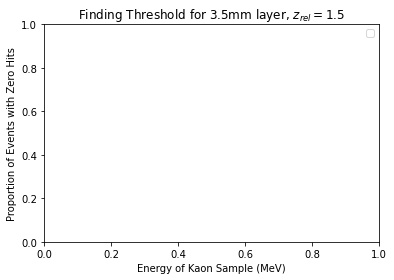

In [401]:
#plt.figure(dpi=300)
#plt.errorbar(eset4*1000,pzeros4,yerr=pzeros4_err,marker='o',linestyle='',label='Samples')
plt.xlabel("Energy of Kaon Sample (MeV)")
plt.ylabel("Proportion of Events with Zero Hits")
plt.title(r"Finding Threshold for 3.5mm layer, $z_{rel} = 1.5$")
plt.legend()

No handles with labels found to put in legend.


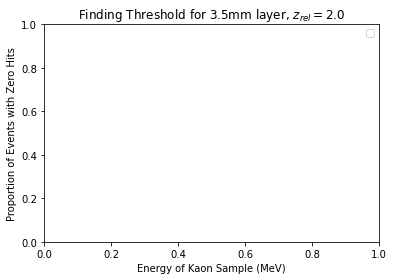

In [402]:
#plt.figure(dpi=300)
#plt.errorbar(eset5*1000,pzeros5,yerr=pzeros5_err,marker='o',linestyle='',label='Samples')
plt.xlabel("Energy of Kaon Sample (MeV)")
plt.ylabel("Proportion of Events with Zero Hits")
plt.title(r"Finding Threshold for 3.5mm layer, $z_{rel} = 2.0$")
plt.legend()

No handles with labels found to put in legend.


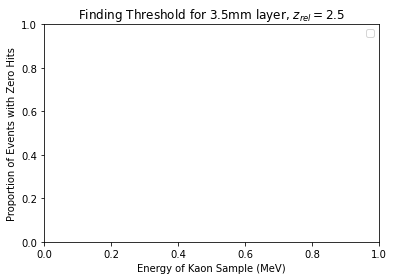

In [403]:
#plt.figure(dpi=300)
#plt.errorbar(eset6*1000,pzeros6,yerr=pzeros6_err,marker='o',linestyle='',label='Samples')
plt.xlabel("Energy of Kaon Sample (MeV)")
plt.ylabel("Proportion of Events with Zero Hits")
plt.title(r"Finding Threshold for 3.5mm layer, $z_{rel} = 2.5$")
plt.legend()

No handles with labels found to put in legend.


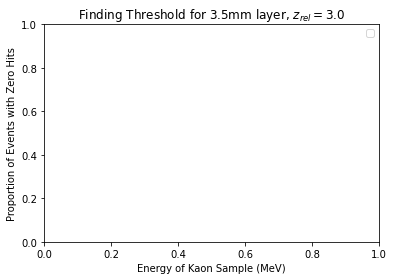

In [404]:
#plt.figure(dpi=300)
#plt.errorbar(eset7*1000,pzeros7,yerr=pzeros7_err,marker='o',linestyle='',label='Samples')
plt.xlabel("Energy of Kaon Sample (MeV)")
plt.ylabel("Proportion of Events with Zero Hits")
plt.title(r"Finding Threshold for 3.5mm layer, $z_{rel} = 3.0$")
plt.legend()

Enter the number of random points to generate: 9


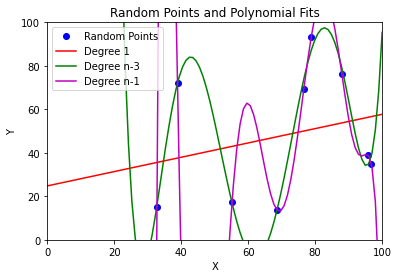

In [364]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the XY plane
X_SIZE = 100
Y_SIZE = 100

# Specify the number of random points
N = int(input("Enter the number of random points to generate: "))

# Generate N random points uniformly distributed in the XY plane
x = np.random.uniform(0, X_SIZE, N)
y = np.random.uniform(0, Y_SIZE, N)

# Plot the random points in blue
plt.plot(x, y, 'bo', label='Random Points')

# Fit the random points using polynomials of degree 1, n-3, and n-1
fit_deg1 = np.polyfit(x, y, 1)
fit_deg_n_minus_3 = np.polyfit(x, y, N-3)
fit_deg_n_minus_1 = np.polyfit(x, y, N-1)

# Create arrays of x values for the fit curves
x_fit = np.linspace(0, X_SIZE, 100)

# Evaluate the fit curves at the x values
y_fit_deg1 = np.polyval(fit_deg1, x_fit)
y_fit_deg_n_minus_3 = np.polyval(fit_deg_n_minus_3, x_fit)
y_fit_deg_n_minus_1 = np.polyval(fit_deg_n_minus_1, x_fit)

# Plot the fit curves in different colors
plt.plot(x_fit, y_fit_deg1, 'r-', label='Degree 1')
plt.plot(x_fit, y_fit_deg_n_minus_3, 'g-', label='Degree n-3')
plt.plot(x_fit, y_fit_deg_n_minus_1, 'm-', label='Degree n-1')

# Set the plot title and axis labels
plt.title('Random Points and Polynomial Fits')
plt.xlabel('X')
plt.ylabel('Y')

# Set the plot limits
plt.xlim(0, X_SIZE)
plt.ylim(0, Y_SIZE)

# Add a legend to the plot
plt.legend()

# Save the plot as an EPS file
#plt.savefig('random_points_and_fits.eps')

# Show the plot
plt.show()

Enter the number of points: 1000
Area of the circle: 3.156
Value of π: 3.156


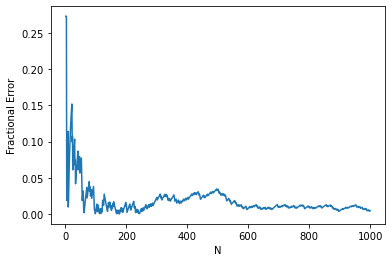

In [368]:
import random
import math
import matplotlib.pyplot as plt

# User-specified number of points
N = int(input("Enter the number of points: "))

# Generate N random points in the range of 0-2 in both x and y directions
points = [(random.uniform(0, 2), random.uniform(0, 2)) for i in range(N)]

# Calculate the number of points within the circle with radius 1 centered at (1, 1)
count = sum(1 for x, y in points if math.sqrt((x-1)**2 + (y-1)**2) <= 1)

# Calculate the area of the circle and the corresponding value of π
area = count/N * 4
pi = area/(1**2)

print("Area of the circle:", area)
print("Value of π:", pi)

# Create a list of N values ranging from 1 to N
N_values = list(range(1, N+1))

# Create a list of fractional errors in the determined value of π for each N
pi_values = []
for i in range(1, N+1):
    count = sum(1 for x, y in points[:i] if math.sqrt((x-1)**2 + (y-1)**2) <= 1)
    area = count/i * 4
    pi = area/(1**2)
    pi_values.append(abs(math.pi - pi)/math.pi)

# Plot the fractional error in the determined value of π as a function of N
plt.plot(N_values, pi_values)
plt.xlabel("N")
plt.ylabel("Fractional Error")
plt.savefig("fractional_error.eps")

In [392]:
528.7 + 0.5*6

531.7

In [14]:
print(np.linspace(0,1,10))

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
